<a href="https://colab.research.google.com/github/QuaziSamiha/Digital_Image_Processing/blob/main/1703155_DIP_Lab_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.
# Take a low-contrast image as an input and perform appropriate transformations to
# produce a high-contrast image.
# Draw the histogram of the two images to distinguish the differences.
# 2.
# Segmentation is the process of separating the different regions in an image based on the intensity values meeting some
# criteria/predicate. Apply any segmentation algorithm to segment an image and find out the difference in segmentation before and after
# the application of an averaging filter to that image.
# So you need to segment the image twice before and after averaging out.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow


1.
Take a low-contrast image as an input and perform appropriate transformations to produce a high-contrast image.
Draw the histogram of the two images to distinguish the differences.

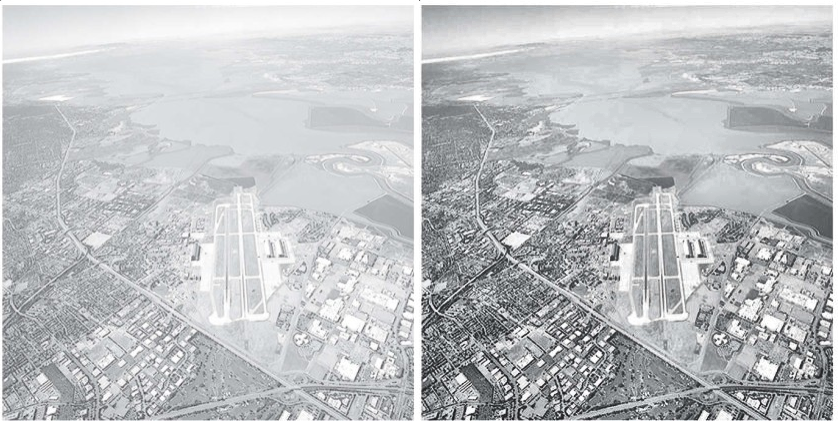

In [ ]:
lowCon = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/lowContrast.PNG')

lowConGray= cv2.cvtColor(lowCon, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lowConGray)

# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

# Stacking the original image with the enhanced image
result = np.hstack((lowCon, enhanced_img))
cv2_imshow(result)

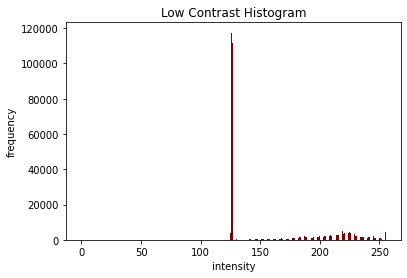

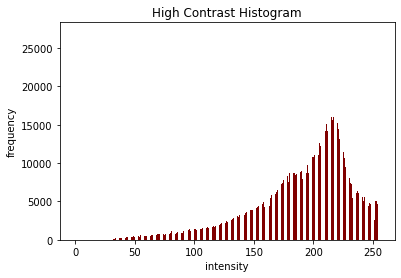

In [ ]:
k=0
H = np.zeros((256), dtype=int)
while k < 256:
    H[k]=np.count_nonzero(lowConGray==k)
    k=k+1

intensity = np.arange(0, 256, 1)

plt.bar(intensity, H, color='maroon', width=0.5)
plt.xlabel('intensity')
plt.ylabel('frequency')
plt.title('Low Contrast Histogram')
plt.show()

k=0
H = np.zeros((256), dtype=int)
while k < 256:
    H[k]=np.count_nonzero(result==k)
    k=k+1

intensity = np.arange(0, 256, 1)

plt.bar(intensity, H, color='maroon', width=0.5)
plt.xlabel('intensity')
plt.ylabel('frequency')
plt.title('High Contrast Histogram')
plt.show()

Discussion of problem 1:
First I have transform low contrast image into high contrast image. Then I have plotted histogram to show diffrence between them.

2. Segmentation is the process of separating the different regions in an image based on the intensity values meeting some criteria/predicate. Apply any segmentation algorithm to segment an image and find out the difference in segmentation before and after the application of an averaging filter to that image.
So you need to segment the image twice before and after averaging out.

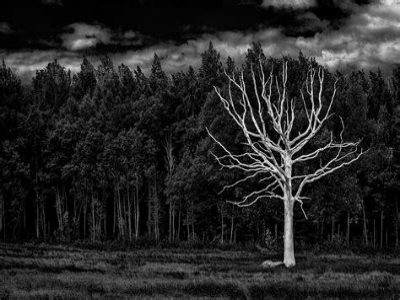

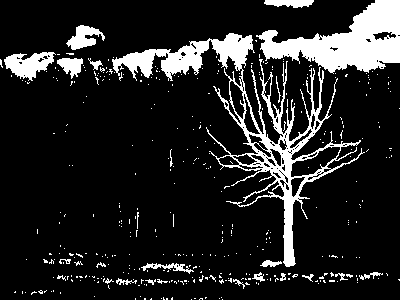

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/th.JPEG')
resized_img = cv2.resize(img, (400,300))
cv2_imshow(resized_img)

grayImg = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
# segmentation using binary threshold
def threshold(im, th):
  height = len(im)
  width = len(im[0])
  for i in range(height):
    for j in range(width):
      if(im[i,j] > th):
        im[i,j] = 255
      else:
        im[i,j] = 0
  return im

cv2_imshow(threshold(grayImg, 75))

Discussion of Problem 2:
Here I have used to binary thresholding to segment into two different region